In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
EBM_data = pd.read_csv('EBM_data.csv', index_col=[0], delimiter=";", parse_dates= [0])


In [3]:
EBM_data.head()

,confirmed_cases
day,
1,1
2,2
3,2
4,2
5,3


In [4]:
EBM_data.tail()

,confirmed_cases
day,
96,753018
97,753063
98,753103
99,753137
100,753167


In [5]:
EBM_data.describe()

,confirmed_cases
count,100.000000
mean,391660.550000
std,349097.461769
min,1.000000
25%,1044.000000
50%,522014.500000
75%,747514.250000
max,753167.000000


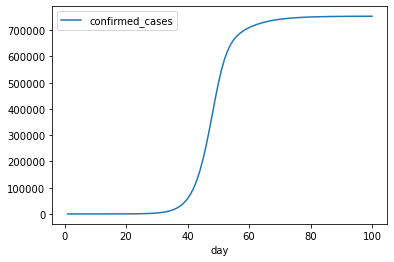

In [6]:
EBM_data.plot()

In [7]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

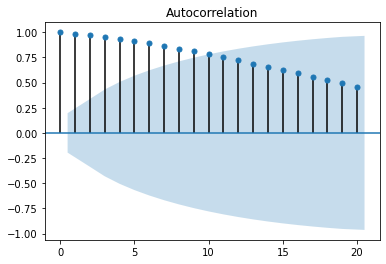

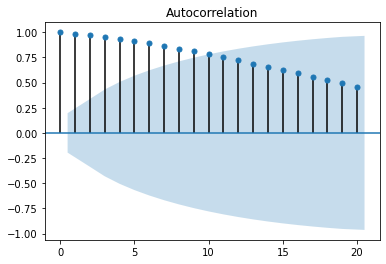

In [8]:
plot_acf(EBM_data)

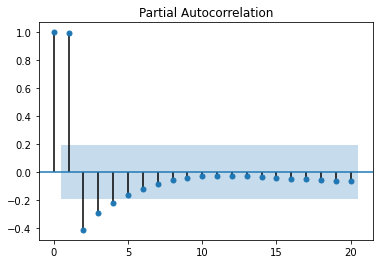

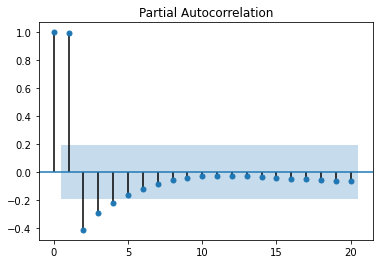

In [9]:
plot_pacf(EBM_data)

In [10]:
EBM_data.size

100

In [11]:
EBM_data_train = EBM_data[0:80]
EBM_data_test = EBM_data[80:100]

In [12]:
EBM_data_train.size

80

In [13]:
EBM_data_test.size

20

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [15]:
EBM_data_model = ARIMA(EBM_data_train, order=(3,0,0))

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [16]:
EBM_data_model_fit = EBM_data_model.fit()

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [17]:
EBM_data_model_fit.aic

1336.9534560199183

In [18]:
EBM_data_forecast = EBM_data_model_fit.forecast(steps = 20)[0]

In [19]:
EBM_data_forecast

array([750658.9116903 , 750953.66129868, 751166.25626843, 751294.80015321,
       751339.45735596, 751302.37046298, 751187.53394115, 751000.62885391,
       750748.82399637, 750440.54943743, 750085.24888102, 749693.11751433,
       749274.83209936, 748841.27998943, 748403.29352226, 747971.39586748,
       747555.56390296, 747165.01307872, 746808.0085172 , 746491.70581567])

In [20]:
EBM_data_test

,confirmed_cases
day,
81,750675
82,751015
83,751312
84,751572
85,751800
86,751998
87,752172
88,752324
89,752456


In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
np.sqrt(mean_squared_error(EBM_data_test, EBM_data_forecast))

3555.4023415202983

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


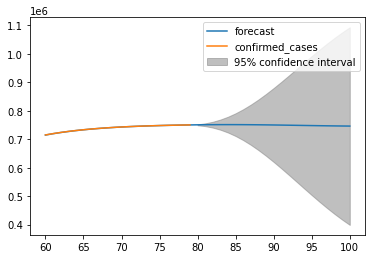

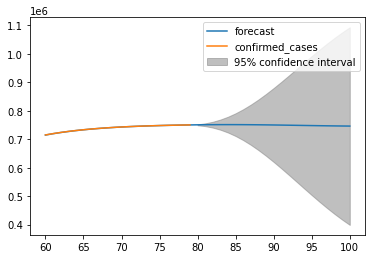

In [23]:
EBM_data_model_fit.plot_predict(60,100)

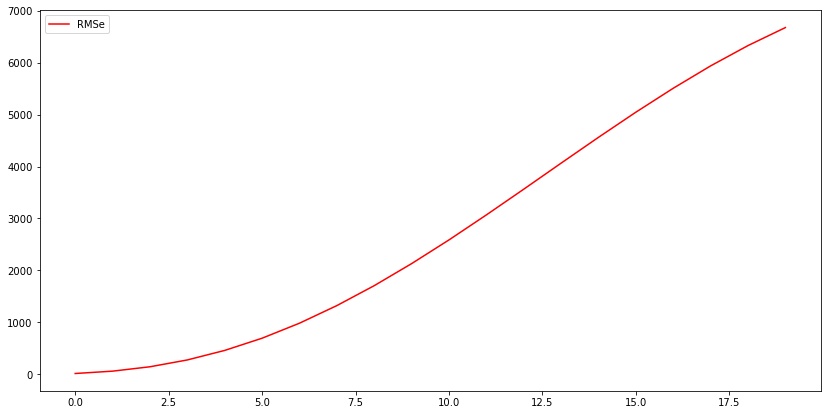

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=[]
for i in range(len(EBM_data_test)):
   #print(sqrt(((EBM_data_test.values[i][0] - EBM_data_forecast[i]) ** 2).mean()))
   rmse.append(sqrt(((EBM_data_test.values[i][0] - EBM_data_forecast[i]) ** 2).mean()))


plt.figure(figsize=(14, 7))
plt.plot(range(len(EBM_data_test)), rmse, color="red", label="RMSe")
plt.legend()

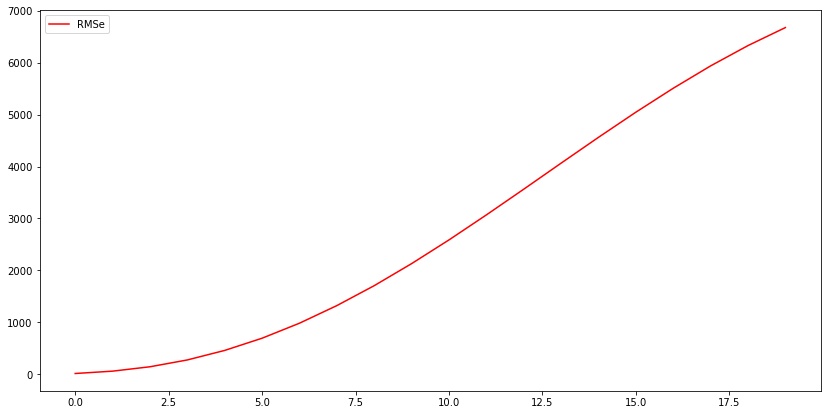

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=[]
for i in range(len(EBM_data_test)):
   #print(sqrt(((EBM_data_test.values[i][0] - EBM_data_forecast[i]) ** 2).mean()))
   rmse.append(sqrt(((EBM_data_test.values[i][0] - EBM_data_forecast[i]) ** 2).mean()))


plt.figure(figsize=(14, 7))
plt.plot(range(len(EBM_data_test)), rmse, color="red", label="RMSe")
plt.legend()

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_value = sqrt(((EBM_data_test.values[i][0] - EBM_data_forecast[i]) ** 2).mean())

print(rmse_value)

6675.294184327591
